# IS 4487 Assignment 18: Exploring APIs with yfinance

In this assignment, you will:
- Choose an industry you're interested in (such as tech, airlines, or retail)
- Use the `yfinance` Python package as an API to collect historical stock price data
- Clean and prepare the data for analysis
- Explore trends, volatility, and relationships between companies
- Summarize your findings and recommendation in a business memo

## Why This Matters

APIs (Application Programming Interfaces) allow businesses to pull live, real-world data from external sources directly into their analytics tools. Financial analysts, investment firms, and business leaders use APIs like `yfinance` to monitor company performance, assess market trends, and build models based on dynamic data.

This assignment helps you gain hands-on experience with one of the most common API workflows in business analytics: fetching, cleaning, analyzing, and interpreting financial data to support better decision-making.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_14_api.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Step 1: Choose an Industry and Find Company Ticker Symbols

Visit the following website to explore U.S. stock sectors and industries:  
https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/

Choose one industry you are interested in (for example: Airlines, Technology, Fast Food, Retail, Energy, etc.).  
Write the names and ticker symbols of 4 public companies in that industry.

**Example:**
- Industry: Technology  
- Tickers: AAPL, MSFT


In [2]:
# Replace this list with your selected tickers
#Industry: Oil & Gas#
tickers = ['OXY', 'BP', 'CVX', 'XOM']

## Step 2: Use yfinance to Collect Historical Stock Data

Follow the steps below to use the `yfinance` API to collect historical stock price data.

### Instructions

1. Make sure the `yfinance` package is installed by running the code cell below.
2. Import any additional Python libraries that you might need to explore or visualize the data.
3. Use the `yf.download()` function to pull **5 years of daily adjusted close prices** for the companies you selected in Step 1.
    - Choose a start date and an end date that span the past 5 years (e.g., `"2020-01-01"` to `"2025-12-31"`).
    - Only select the **'High'** column, which represents the daily high
4. Preview the first few rows of the dataset using `.head()` to confirm that the data has loaded correctly.



In [3]:
# Import necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd

In [4]:
# Download adjusted close prices
df = yf.download(tickers, start="2020-01-01", end="2025-12-31")['High']

/tmp/ipython-input-3450391006.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2020-01-01", end="2025-12-31")['High']
[*********************100%***********************]  4 of 4 completed


In [5]:
df.head()

Ticker,BP,CVX,OXY,XOM
Date,,,,
2020-01-02,27.506342,93.070922,39.189398,53.752540
2020-01-03,28.184094,93.904991,40.621474,54.017449
2020-01-06,28.897880,93.101521,41.723086,54.009881
2020-01-07,28.465283,91.617026,41.567017,53.374103
2020-01-08,28.335504,91.127306,42.026013,53.200037


## Step 3: Clean the Data

The data you pulled may contain missing values. Follow these steps:

1. Check the dataset for missing values using `.isnull().sum()`.
2. Fill any missing values using a forward fill method.
3. Recheck for missing values to confirm they have been handled.



In [7]:
print("Missing values before filling:")
print(df.isnull().sum())

df.ffill(inplace=True)

print("\nMissing values after filling:")
print(df.isnull().sum())

Missing values before filling:
Ticker
BP     0
CVX    0
OXY    0
XOM    0
dtype: int64

Missing values after filling:
Ticker
BP     0
CVX    0
OXY    0
XOM    0
dtype: int64


Observation: there was not any missing value to fill, the data is complete and ready to be analyzed.

## Step 4: Calculate Daily Returns

To better understand price movement, calculate the daily percentage change for each stock.

1. Use the `.pct_change()` method to calculate daily returns.
2. Drop any rows with missing values that may result from this calculation.
3. Preview the returns DataFrame to confirm it's correct.


In [9]:
daily_returns = df.pct_change()
daily_returns.dropna(inplace=True)
daily_returns.head()

Ticker,BP,CVX,OXY,XOM
Date,,,,
2020-01-03,0.024640,0.008962,0.036542,0.004928
2020-01-06,0.025326,-0.008556,0.027119,-0.000140
2020-01-07,-0.014970,-0.015945,-0.003741,-0.011772
2020-01-08,-0.004559,-0.005345,0.011042,-0.003261
2020-01-09,-0.008652,-0.009825,-0.008300,-0.005548


## Step 5: Explore the Data Visually and Statistically

In this step, you will create visualizations and metrics to help understand stock behavior. Don’t interpret or explain anything here — just create the outputs so you can use them in your reflection later.

1. Create a line chart showing stock prices over the 5-year period.
2. Calculate the standard deviation of daily returns for each stock (volatility).
3. Create a correlation matrix of the daily returns between companies.




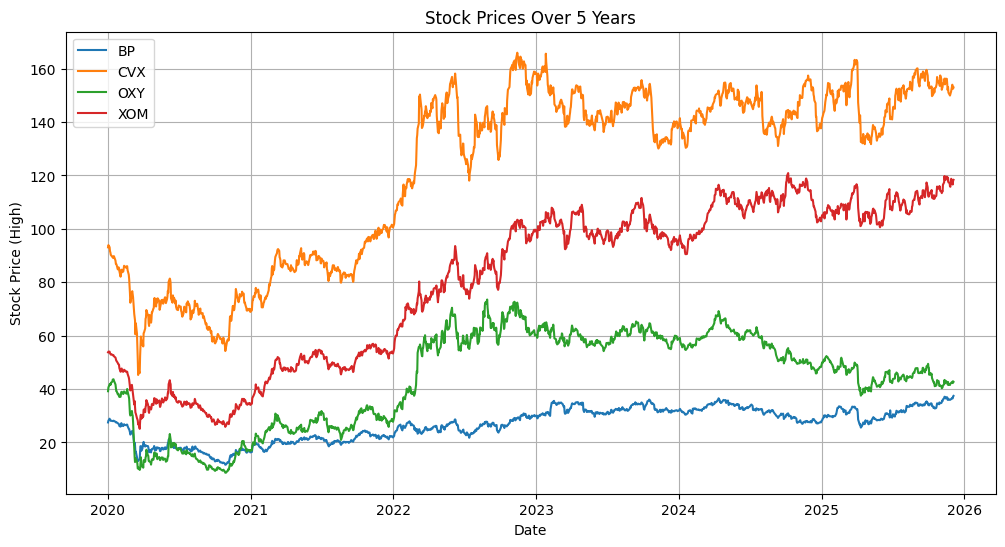


Daily Returns Volatility (Standard Deviation):
Ticker
BP     0.021877
CVX    0.017810
OXY    0.034591
XOM    0.018541
dtype: float64

Correlation Matrix of Daily Returns:
Ticker        BP       CVX       OXY       XOM
Ticker                                        
BP      1.000000  0.725118  0.609150  0.733056
CVX     0.725118  1.000000  0.693584  0.833293
OXY     0.609150  0.693584  1.000000  0.734170
XOM     0.733056  0.833293  0.734170  1.000000


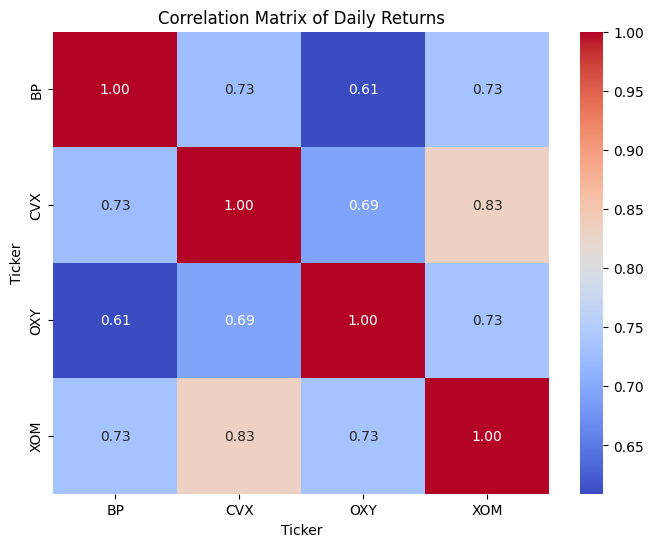

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a line chart showing stock prices over the 5-year period.
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('Stock Prices Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Stock Price (High)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Calculate the standard deviation of daily returns for each stock (volatility).
volatility = daily_returns.std()
print("\nDaily Returns Volatility (Standard Deviation):")
print(volatility)

# 3. Create a correlation matrix of the daily returns between companies.
correlation_matrix = daily_returns.corr()
print("\nCorrelation Matrix of Daily Returns:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns')
plt.show()

Observation: I see tht almost all stock prices increased during the 5 years span, but with different variation as some companies value increased more that other. Most likley we need to look further for the reasons of this variation to make better decisions.

## Step 6: Write a Stakeholder Recommendation Memo

Now that you’ve completed your analysis, it’s time to turn your work into a clear, professional memo for a business audience.

### Scenario

You’ve been asked by a stakeholder (an investor, executive, or client) to evaluate whether it's a good time to invest in a particular industry. They’ve asked you to use recent stock performance data from several leading companies in that industry to help guide their decision.

### Your Task

Use the results from your code in Steps 2–5 to write a **multi-paragraph business memo** that:

1. **Introduces the industry you analyzed** and names the companies you included.
2. **Summarizes major trends** you observed in the stock prices over the last 5 years.
3. **Discusses key metrics**, such as volatility and correlations between companies.
4. **Presents your investment recommendation** — based on your evidence — and explains why you would or wouldn’t advise investing in this industry now.
5. **Suggests future analytics or data sources** that could strengthen or update your recommendation going forward.

This final section should show that you understand how real-world decisions evolve. Think about:
- What **additional data** might help (e.g., earnings reports, economic indicators, sentiment analysis)?
- What **types of models** could be applied (e.g., forecasting, classification, risk modeling)?
- How often should the analysis be updated?

### Format & Expectations

- Write **2–4 paragraphs** in business memo format (not bullet points).
- Use **specific, data-driven evidence** from your own analysis.
- Keep your writing professional and clear — imagine your reader is a client or executive, not a data analyst.
- Your memo should be written **entirely in your own words**. Do not copy from examples, online sources, or AI tools. Your writing should reflect your understanding and your interpretation of the results.
- You do not need to include charts in the memo — the code cells above already display them.



### Add memo here:

I analyzed the stock performance of four major oil and gas companies over the last five years, including ExxonMobil (XOM), Chevron (CVX), Occidental Petroleum (OXY), and BP (BP). Although there have been significant fluctuations in this business because of global events, the stock prices of all four companies have generally increased over the long run. Although every business showed the same overall rising trend, the degree growth and variations differed from company to company. It means that market exposure, company-specific strategies, and financial choices were significant factors in determining performance.

When looking at volatility, OXY was the most volatile with a daily standard deviation of about 0.0346, meaning its price moved more compared to the others. BP showed the lowest growth and normal volatility, while CVX and XOM had more stable movements, suggesting that they may be less risky options for investment. All of the firms have high correlations, particularly between CVX and XOM (0.83), which indicates that they frequently move in the same direction. This indicates that shared market variables, such changes in oil prices and worldwide energy demand, have an impact on the oil and gas industry.

Based on the analysis, I definitely recommend investing in the oil and gas industry, as all four companies showed solid growth over the past five years. However, the investor should choose the specific company carefully depending on their investing style. If the investor prefers higher risk with the possibility of higher returns, then OXY is the best fit because it has the strongest price swings and the highest growth potential, even though it is more volatile, as shown in the line chart. For a more stable and safer long-term investment, XOM and CVX are stronger choices since they showed steady growth with lower volatility. BP may still be an option, but it performed more modestly compared to the others, so it would suit an investor who wants exposure to the industry but prefers slower, steady movement. Overall, the industry is promising, but picking the right company should match the investor’s risk tolerance and financial goals.

To improve this analysis in the future, it would be useful to include additional data such as oil price trends, company earnings reports, market sentiment, and global economic indicators. Additionally, Considering the rapid changes in the oil and gas industry, this study should be updated on a monthly or quarterly basis to take into account new business announcements and worldwide events. When making future investment decisions, this would provide decision-makers with a more comprehensive view.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [11]:
!jupyter nbconvert --to html "assignment_14_AlhinaiAlmuhanna.ipynb"

[NbConvertApp] Converting notebook assignment_14_AlhinaiAlmuhanna.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 522433 bytes to assignment_14_AlhinaiAlmuhanna.html
